In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
orders=pd.read_csv('olist_orders_dataset.csv')
orders_items=pd.read_csv('olist_order_items_dataset.csv')
payments=pd.read_csv('olist_order_payments_dataset.csv')
customers=pd.read_csv('olist_customers_dataset.csv')


In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
orders_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [12]:
orders_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [14]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [15]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [16]:
orders_total=orders_items.groupby('order_id')['price'].sum()
orders_total=orders_total.reset_index()

In [17]:
orders_merged=orders.merge(orders_total,on='order_id')

In [18]:
orders_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,19.90


In [19]:
orders_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       98666 non-null  object 
 1   customer_id                    98666 non-null  object 
 2   order_status                   98666 non-null  object 
 3   order_purchase_timestamp       98666 non-null  object 
 4   order_approved_at              98652 non-null  object 
 5   order_delivered_carrier_date   97657 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  98666 non-null  object 
 8   price                          98666 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [20]:
orders_final=customers[['customer_id','customer_state']].merge(orders_merged,on='customer_id')

In [21]:
orders_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    98666 non-null  object 
 1   customer_state                 98666 non-null  object 
 2   order_id                       98666 non-null  object 
 3   order_status                   98666 non-null  object 
 4   order_purchase_timestamp       98666 non-null  object 
 5   order_approved_at              98652 non-null  object 
 6   order_delivered_carrier_date   97657 non-null  object 
 7   order_delivered_customer_date  96476 non-null  object 
 8   order_estimated_delivery_date  98666 non-null  object 
 9   price                          98666 non-null  float64
dtypes: float64(1), object(9)
memory usage: 7.5+ MB


In [22]:
orders_final['order_purchase_timestamp']=pd.to_datetime(orders_final['order_purchase_timestamp'])

In [24]:
reference_data=orders_final['order_purchase_timestamp'].max()
last_perchase_date= orders_final.groupby('customer_id')['order_purchase_timestamp'].max()

In [25]:
recency=reference_data-last_perchase_date
recency_days=recency.dt.days

In [27]:
recency_days=recency_days.reset_index()

In [28]:
recency_days.head()

,customer_id,order_purchase_timestamp
0,00012a2ce6f8dcda20d059ce98491703,292
1,000161a058600d5901f007fab4c27140,413
2,0001fd6190edaaf884bcaf3d49edf079,551
3,0002414f95344307404f0ace7a26f1d5,382
4,000379cdec625522490c315e70c7a9fb,153


In [29]:
recency_days=recency_days.rename(columns={'order_purchase_timestamp':'recency'})

In [30]:
recency_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  98666 non-null  object
 1   recency      98666 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [32]:
frequency=orders_final.groupby('customer_id')['order_id'].count()

In [33]:
frequency=frequency.reset_index()

In [35]:
frequency=frequency.rename(columns={'order_id':"frequency"})

In [36]:
frequency.head()

,customer_id,frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


In [37]:
monetary=orders_final.groupby('customer_id')['price'].sum()

In [38]:
monetary=monetary.reset_index()

In [39]:
monetary=monetary.rename(columns={'price':'monetary'})

In [40]:
monetary.head()

,customer_id,monetary
0,00012a2ce6f8dcda20d059ce98491703,89.80
1,000161a058600d5901f007fab4c27140,54.90
2,0001fd6190edaaf884bcaf3d49edf079,179.99
3,0002414f95344307404f0ace7a26f1d5,149.90
4,000379cdec625522490c315e70c7a9fb,93.00


In [41]:
rf=recency_days.merge(frequency,on='customer_id')
rfm=rf.merge(monetary,on='customer_id')

In [43]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  98666 non-null  object 
 1   recency      98666 non-null  int64  
 2   frequency    98666 non-null  int64  
 3   monetary     98666 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


In [46]:
rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=[5,4,3,2,1])


In [48]:
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
rfm['m_score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5])

In [49]:
rfm['rfm_score'] = (
    rfm['r_score'].astype(str) + 
    rfm['f_score'].astype(str) + 
    rfm['m_score'].astype(str)
)


In [50]:
def segment_customer(row):
    if row['rfm_score'] == '555':
        return 'Champions'
    elif row['r_score'] == 5 and row['f_score'] >= 4:
        return 'Loyal Customers'
    elif row['r_score'] >= 4:
        return 'Recent Customers'
    elif row['f_score'] >= 4:
        return 'Frequent Buyers'
    elif row['m_score'] >= 4:
        return 'Big Spenders'
    else:
        return 'Others'

rfm['segment'] = rfm.apply(segment_customer, axis=1)


In [51]:
rfm['segment'].value_counts()


segment
Recent Customers    31648
Frequent Buyers     23744
Others              21514
Big Spenders        13850
Loyal Customers      7122
Champions             788
Name: count, dtype: int64

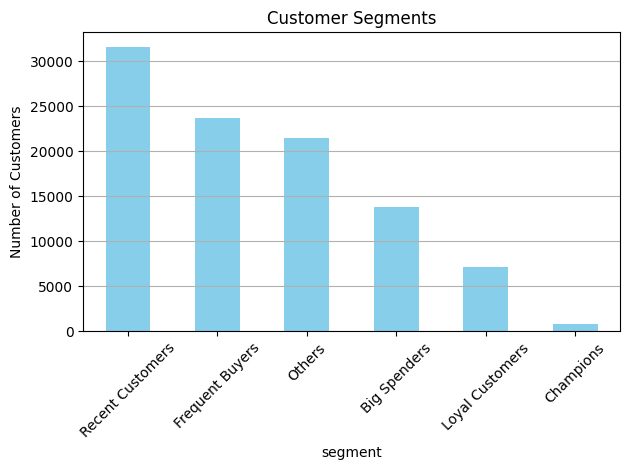

In [52]:
import matplotlib.pyplot as plt
rfm['segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Customer Segments')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [53]:
rfm.to_csv('rfm_segmented_customers.csv', index=False)


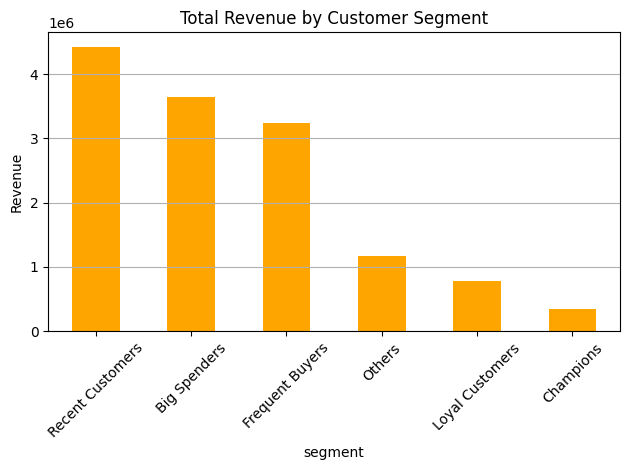

In [54]:
segment_revenue = rfm.groupby('segment')['monetary'].sum().sort_values(ascending=False)

segment_revenue.plot(kind='bar', color='orange')
plt.title('Total Revenue by Customer Segment')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [55]:
champions = rfm[rfm['segment'] == 'Champions']
top_champions = champions.sort_values(by='monetary', ascending=False).head(10)
print(top_champions[['customer_id', 'recency', 'frequency', 'monetary']])


                            customer_id  recency  frequency  monetary
91284  ec5b2ba62e574342386871631fafd3fc       49          1   7160.00
94398  f48d464a0baaea338cb25f816991ab1f       39          1   6729.00
86733  e0a2412720e9ea4f26c1ac985f6a7358       52          1   4599.90
79111  cc803a2c412833101651d3f90ca7de24       94          1   4400.00
90293  e9b0d0eb3015ef1c9ce6cf5b9dcbee9f       36          1   4059.00
90963  eb7a157e8da9c488cd4ddc48711f1097       89          1   3899.00
95427  f7622098214b4634b7fe7eee269b5426       93          1   2919.40
92874  f08306b95370e8d5f0d97b71229284b6       34          1   2338.08
93769  f2c743697f9b2ff2902df23a16582d80       20          1   2338.08
89050  e683dddabd8f5c3ad3708a3364e932f8       14          1   2300.00
